### Multistrategy Allingrid

This is the trade analyzer for ^nbx
2020-09-22, Signal created at price-level:  21139.10
Date: 2020-09-22 | Cash: 100000.00 | Price: 21181.38 | Buy amount: 5
2020-09-23, Signal created at price-level:  21178.50
Date: 2020-09-23 | Cash: 100000.00 | Price: 21220.86 | Buy amount: 5
2021-01-27, Signal created at price-level:  30284.55
Date: 2021-01-27 | Cash: 121868.82 | Price: 30345.12 | Buy amount: 4
ROI:        40.92%


<IPython.core.display.Javascript object>


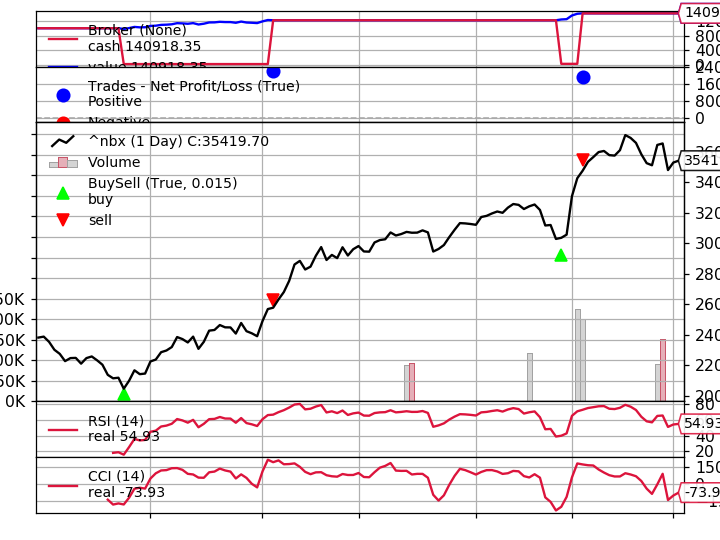

[[<Figure size 640x480 with 6 Axes>]]

In [1]:
import backtrader as bt
import backtrader.feeds as btfeeds
import backtrader.indicators as btind
import backtrader.analyzers as btanalyzers
from datetime import datetime
import pprint

######################################
stock_ticker = '^nbx'               #
fromdate = datetime(2020, 9, 1)    #
todate = datetime(2021, 3, 3)     #
##################################

#######################################################################
cerebro = bt.Cerebro()                                               #
cerebro.broker.setcash(100000.0)                                    #
#cerebro.addsizer(bt.sizers.FixedSize,stake=800)                   #
print('This is the trade analyzer for', stock_ticker)             #
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trades")  #
#################################################################


'''

class SmaCross(bt.SignalStrategy):
    params = (('pfast', 2), ('pslow', 11),)
    
    def log(self, txt, dt=None):
        # Logging function for this strategy
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=self.p.pfast), bt.ind.SMA(period=self.p.pslow)
        #self.signal_add(bt.SIGNAL_LONG, bt.ind.CrossOver(sma1, sma2))
        self.buysig = btind.CrossOver(sma1, sma2)    
    
    def start(self):
        self.val_start = self.broker.get_cash()  # keep the starting cash
        
    def next(self):
        
        buy_price = self.data.close[0] * (1+0.002)
        sell_price = self.data.close[0] *(1-0.002)
        cash = self.broker.get_cash()
        size = cash/buy_price
        curdate = self.datetime.date(ago=0)  # 0 is the default
        
        #if not self.position:  # not in the market
        if self.buysig > 0 and not self.position:  # if fast crosses slow to the upside
            self.buy(size=size)  # enter long
            self.log('Signal created at price-level:  %.2f' % self.data.close[0])
            print('Date:', curdate, "| Cash: %.2f | Price: %.2f | Buy amount: %.f" %(cash,buy_price,size))


        elif self.buysig < 0:  # in the market & cross to the downside
            self.close()  # close long position   


    def stop(self):
        self.roi = (self.broker.get_value() / self.val_start) - 1.0
        print('==================================================')
        print('Starting Value: %.f' % self.broker.startingcash)
        print('Ending   Value: %.f' % self.broker.getvalue())
        print('ROI: {:.2f}%'.format(100.0 * self.roi))
        print('==================================================')
     
'''

##########################################################
########### RSIandCCI STRATEGY ###########################
##########################################################


class RSIandCCIStrategy(bt.Strategy):
    
    #def log(self, txt, dt=None):
    #    ''' Logging function for this strategy'''
    #    dt = dt or sel.datas[0].datetime.date(0)
    #    print('%s, %s'%(dt.isoformat(), txt))
    
    def log(self, txt, dt=None):
        # Logging function for this strategy
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):

        self.rsi = bt.talib.RSI(self.data, period=14)
        self.cci = bt.talib.CCI(self.datas[0].high, self.datas[0].low, self.datas[0].close, period=14)
        
    def next(self):
        buy_price = self.data.close[0] * (1+0.002)
        sell_price = self.data.close[0] *(1-0.002)
        cash = self.broker.get_cash()
        size = cash/buy_price
        curdate = self.datetime.date(ago=0)  # 0 is the default
        
        
        if self.rsi < 45 and self.cci < -100 and not self.position:
            #if self.rsi[-5] < self.rsi:
            self.buy(size=size)
            self.log('Signal created at price-level:  %.2f' % self.data.close[0])
            print('Date:', curdate, "| Cash: %.2f | Price: %.2f | Buy amount: %.f" %(cash,buy_price,size))

        if self.rsi > 70 or self.cci >= 200 and self.position:
            #if self.rsi[-4] > self.rsi*1.3 and self.position:
            self.close()
            
            
    def start(self):
        self.val_start = self.broker.get_cash()  # keep the starting cash

    def stop(self):
        # calculate the actual returns
        
        self.roi = (self.broker.get_value() / self.val_start) - 1.0
        print('ROI:        {:.2f}%'.format(100.0 * self.roi))
        

##########################################################



#data = bt.feeds.YahooFinanceCSVData(dataname='ARISE.ST.csv')
data = bt.feeds.YahooFinanceData(dataname=stock_ticker,
                                 fromdate=fromdate,
                                 todate=todate)

cerebro.adddata(data)
cerebro.addstrategy(RSIandCCIStrategy)
cerebro.run()
cerebro.plot(style='line')



In [ ]:
results = cerebro.run()

cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trades")
cerebro.addanalyzer(bt.analyzers.DrawDown, _name="drawdown_1")
cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name="sharpe_ratio") #Calculates the SharpeRatio of a strategy using a risk free asset which is simply an interest rate. 
cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")

#cerebro.addanalyzer(bt.analyzers.Calmar, _name="calmar")



strategyinfo = results[0].analyzers.getbyname("trades").get_analysis()
drawdowns = results[0].analyzers.getbyname("drawdown_1").get_analysis()
sharpe_ratio = results[0].analyzers.getbyname("sharpe_ratio").get_analysis()
sqn = results[0].analyzers.getbyname("sqn").get_analysis()

#calmar = results[0].analyzers.getbyname("calmar").get_analysis()




print('==================================================')

print('Profit:', round(strategyinfo['long']['pnl']['total'],2))
print('The strategy had', strategyinfo['total']['total'], 'buys and', strategyinfo['total']['closed'], 'sells' )
print('Won trades: ', strategyinfo['won']['total'], '| Total sum won:  ', round(strategyinfo['won']['pnl']['total'],2))
print('Lost trades:', strategyinfo['lost']['total'], '| Total sum lost:', round(strategyinfo['lost']['pnl']['total'],2))
print('Total time (bars) in market:', strategyinfo['len']['total'], '| Won:', strategyinfo['len']['won']['total'], '| Max:', strategyinfo['len']['max'], '| Min:', strategyinfo['len']['min'])
print('Biggest win:', round(strategyinfo['won']['pnl']['max'],2))
print('Biggest loss:', round(strategyinfo['lost']['pnl']['max'], 2))
print('Gross Average Profit/Loss pr. trade:', round(strategyinfo['pnl']['gross']['average'],2))
print('Max drawdown (bars):', drawdowns['len'], '| Max drawdown:', round(drawdowns['drawdown'], 2),'%', '| Max moneydown:', round(drawdowns['moneydown'],2))
print('Sharpe ratio:', round(sharpe_ratio['sharperatio'],3))
print('==================================================')
print('SQN:' ,round(sqn['sqn'],2), '| SQN: 1.6-1.9 Below average, 2.0-2.4 Average, 2.5-2.9 Good, 3.0-5.0 Excellent, 5.1-6.9 Superb, 7.0 - Holy Grail')
print('SQN Reliable > 30 trades. Formula: SquareRoot(NumberTrades) * Average(TradesProfit) / StdDev(TradesProfit)')

#pp = pprint.PrettyPrinter(indent=2)
#pp.pprint(calmar)


print('==================================================')


In [ ]:
## GET TRANSACTIONS *RUN TWICE ##
import backtrader.analyzers as btanalyzers
import pprint



back = cerebro.run()
cerebro.addanalyzer(btanalyzers.Transactions, _name = "trans")
transactions = back[0].analyzers.trans.get_analysis()
items = list(transactions.values())
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(transactions)

In [ ]:
results = cerebro.run()


In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8; py-indent-offset:4 -*-
###############################################################################
#
# Copyright (C) 2015-2020 Daniel Rodriguez
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#
###############################################################################
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import argparse
import datetime

# The above could be sent to an independent module
import backtrader as bt
import backtrader.feeds as btfeeds
import backtrader.indicators as btind


class MultiDataStrategy(bt.Strategy):
    '''
    This strategy operates on 2 datas. The expectation is that the 2 datas are
    correlated and the 2nd data is used to generate signals on the 1st

      - Buy/Sell Operationss will be executed on the 1st data
      - The signals are generated using a Simple Moving Average on the 2nd data
        when the close price crosses upwwards/downwards

    The strategy is a long-only strategy
    '''
    params = dict(
        period=15,
        stake=10,
        printout=True,
    )

    def log(self, txt, dt=None):
        if self.p.printout:
            dt = dt or self.data.datetime[0]
            dt = bt.num2date(dt)
            print('%s, %s' % (dt.isoformat(), txt))

    def notify_order(self, order):
        if order.status in [bt.Order.Submitted, bt.Order.Accepted]:
            return  # Await further notifications

        if order.status == order.Completed:
            if order.isbuy():
                buytxt = 'BUY COMPLETE, %.2f' % order.executed.price
                self.log(buytxt, order.executed.dt)
            else:
                selltxt = 'SELL COMPLETE, %.2f' % order.executed.price
                self.log(selltxt, order.executed.dt)

        elif order.status in [order.Expired, order.Canceled, order.Margin]:
            self.log('%s ,' % order.Status[order.status])
            pass  # Simply log

        # Allow new orders
        self.orderid = None

    def __init__(self):
        # To control operation entries
        self.orderid = None

        # Create SMA on 2nd data
        sma = btind.MovAv.SMA(self.data1, period=self.p.period)
        # Create a CrossOver Signal from close an moving average
        self.signal = btind.CrossOver(self.data1.close, sma)

    def next(self):
        if self.orderid:
            return  # if an order is active, no new orders are allowed

        if self.p.printout:
            print('Self  len:', len(self))
            print('Data0 len:', len(self.data0))
            print('Data1 len:', len(self.data1))
            print('Data0 len == Data1 len:',
                  len(self.data0) == len(self.data1))

            print('Data0 dt:', self.data0.datetime.datetime())
            print('Data1 dt:', self.data1.datetime.datetime())

        if not self.position:  # not yet in market
            if self.signal > 0.0:  # cross upwards
                self.log('BUY CREATE , %.2f' % self.data1.close[0])
                self.buy(size=self.p.stake)
                self.buy(data=self.data1, size=self.p.stake)

        else:  # in the market
            if self.signal < 0.0:  # crosss downwards
                self.log('SELL CREATE , %.2f' % self.data1.close[0])
                self.sell(size=self.p.stake)
                self.sell(data=self.data1, size=self.p.stake)

    def stop(self):
        print('==================================================')
        print('Starting Value - %.2f' % self.broker.startingcash)
        print('Ending   Value - %.2f' % self.broker.getvalue())
        print('==================================================')


def runstrategy():
    args = parse_args()

    # Create a cerebro
    cerebro = bt.Cerebro()

    # Get the dates from the args
    #fromdate = datetime.datetime.strptime(args.fromdate, '%Y-%m-%d')    
    #todate = datetime.datetime.strptime(args.todate, '%Y-%m-%d')
    fromdate='2020-01-01'#datetime(2020, 1, 1)
    todate='2021-03-01'#datetime(2021, 2, 26)

    
    # Create the 1st data
#    data0 = bt.feeds.YahooFinanceData(
#        dataname=args.data0,
#        fromdate=fromdate,
#        todate=todate)
    
    
    data0 = bt.feeds.YahooFinanceCSVData(dataname='ARISE.ST.csv')

    
#    # Create the 1st data
#    data0 = btfeeds.YahooFinanceCSVData(
#        dataname=args.data0,
#        fromdate=fromdate,
#        todate=todate)

    # Add the 1st data to cerebro
    cerebro.adddata(data0)

    # Create the 2nd data
#   data1 = bt.feeds.YahooFinanceData(
#        dataname=args.data1,
#        fromdate=fromdate,
#        todate=todate)
    
    data1 = bt.feeds.YahooFinanceCSVData(dataname='ASA.OL.csv')


    # Add the 2nd data to cerebro
    cerebro.adddata(data1)

    # Add the strategy
    cerebro.addstrategy(MultiDataStrategy,
                        period=args.period,
                        stake=args.stake)

    # Add the commission - only stocks like a for each operation
    cerebro.broker.setcash(args.cash)

    # Add the commission - only stocks like a for each operation
    cerebro.broker.setcommission(commission=args.commperc)

    # And run it
    cerebro.run()

    # Plot if requested
    if args.plot:
        cerebro.plot(numfigs=args.numfigs, volume=False, zdown=False)


def parse_args():
    parser = argparse.ArgumentParser(description='MultiData Strategy')

    parser.add_argument('--data0', '-d0',
                        default='arise.st',
                        help='1st data into the system')

    parser.add_argument('--data1', '-d1',
                        default='asa.ol',
                        help='2nd data into the system')

    parser.add_argument('--fromdate', '-f',
                        default='2020-01-01',
                        help='Starting date in YYYY-MM-DD format')

    parser.add_argument('--todate', '-t',
                        default='2021-03-01',
                        help='Ending date in YYYY-MM-DD format')

    parser.add_argument('--period', default=15, type=int,
                        help='Period to apply to the Simple Moving Average')

    parser.add_argument('--cash', default=100000, type=int,
                        help='Starting Cash')

    #parser.add_argument('--runnext', action='store_true',
    #                    help='Use next by next instead of runonce')

    #parser.add_argument('--nopreload', action='store_true',
    #                    help='Do not preload the data')

    #parser.add_argument('--oldsync', action='store_true',
    #                    help='Use old data synchronization method')

    parser.add_argument('--commperc', default=0.005, type=float,
                        help='Percentage commission (0.005 is 0.5%%')

    parser.add_argument('--stake', default=10, type=int,
                        help='Stake to apply in each operation')

    parser.add_argument('--plot', '-p', action='store_true',
                        help='Plot the read data')

    parser.add_argument('--numfigs', '-n', default=1,
                        help='Plot using numfigs figures')

    return parser.parse_args()


if __name__ == '__main__':
    runstrategy()


In [ ]:
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

printmd("**bold green text**", color="green")